# <ins>Análise de Resultados</ins>

In [2]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt
from IPython.display import display

### Conectando ao banco de dados

In [3]:
conn = psql.connect(
    host='localhost',
    database='algoritmos',
    user='postgres',
    password='ypghck52'
)

cur = conn.cursor()

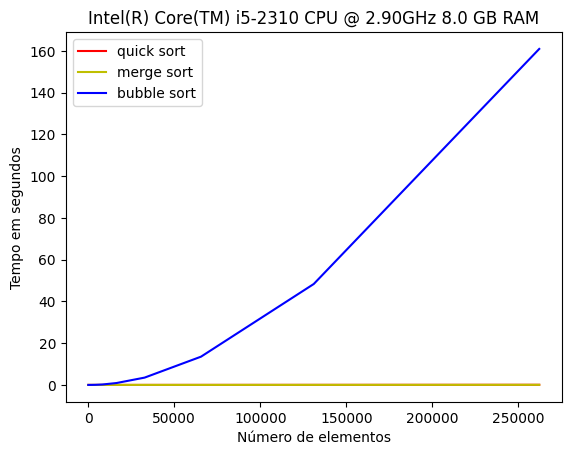

In [45]:
cur.execute('SELECT cpu, ram FROM hardware WHERE id = 1')
cpu, ram = cur.fetchone()
cur.execute('SELECT * FROM bubble(1) WHERE size > 16')

bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
bubble_results = bubble_results.drop(['hardware_id'], axis=1)
bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5

cur.execute('SELECT * FROM merge(1) WHERE size > 16')
merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
merge_results = merge_results.drop(['hardware_id'], axis=1)
merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5

cur.execute('SELECT * FROM quick(1) WHERE size > 16')
quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
quick_results = quick_results.drop(['hardware_id'], axis=1)
quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5

plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'r', label='quick sort')
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'y', label='merge sort')
plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), 'b', label='bubble sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

Lembrando:

* merge Sort: $O(n^2)$
* merge Sort: $O(n*log(n))$ - em média
* merge Sort: $O(n*log(n))$ - para os piores casos

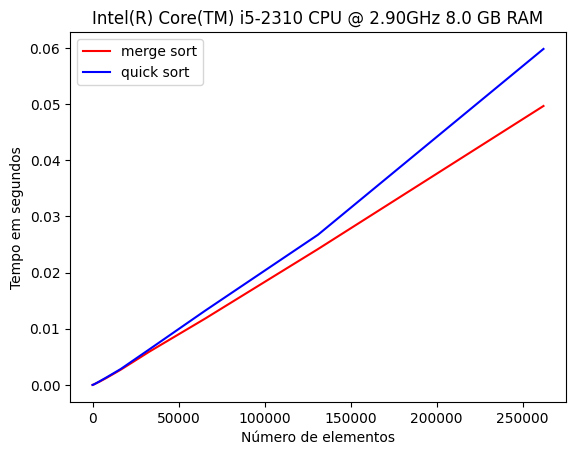

In [46]:
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'r', label='merge sort')
plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'b', label='quick sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

Podemos ver claramente que o merge Sort começa a tender para um comportamento $O(n^2)$. O merge Sort acaba sendo a melhor opção.

,Intel(R) Core(TM) i5-2310 CPU @ 2.90GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,5,1,32,2,1,2,2,4,0.000002,0.000001
1,6,1,64,4,4,5,5,8,0.000005,0.000002
2,7,1,128,10,10,10,11,15,0.000011,0.000002
3,8,1,256,22,22,24,26,30,0.000025,0.000003
4,9,1,512,53,54,54,55,75,0.000058,0.000009
5,10,1,1024,119,120,122,124,142,0.000125,0.000009
6,11,1,2048,375,264,264,266,280,0.000290,0.000048
7,12,1,4096,572,573,572,580,615,0.000582,0.000019
8,13,1,8192,1254,1261,1254,1260,1285,0.001263,0.000013
9,14,1,16384,2673,2793,2668,2668,2738,0.002708,0.000056


,Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz 16.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,23,2,32,2,3,3,3,5,0.000003,0.000001
1,24,2,64,6,16,8,8,11,0.000010,0.000004
2,25,2,128,6,14,10,10,13,0.000011,0.000003
3,26,2,256,19,23,21,19,31,0.000023,0.000005
4,27,2,512,37,44,40,40,46,0.000041,0.000004
5,28,2,1024,79,80,82,106,88,0.000087,0.000011
6,29,2,2048,223,237,182,270,333,0.000249,0.000057
7,30,2,4096,386,390,388,388,413,0.000393,0.000011
8,31,2,8192,854,853,851,856,868,0.000856,0.000007
9,32,2,16384,1831,1832,1833,1832,1887,0.001843,0.000025


,Intel(R) Core(TM) i5-3330 CPU @ 3.00GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,41,3,32,1,1,1,2,5,0.000002,0.000002
1,42,3,64,3,3,4,5,8,0.000005,0.000002
2,43,3,128,9,10,9,10,17,0.000011,0.000003
3,44,3,256,21,23,36,86,597,0.000153,0.000250
4,45,3,512,52,56,54,55,59,0.000055,0.000003
5,46,3,1024,111,112,113,117,132,0.000117,0.000009
6,47,3,2048,245,247,248,252,283,0.000255,0.000016
7,48,3,4096,572,559,572,564,595,0.000572,0.000014
8,49,3,8192,1152,1153,1199,1229,1223,0.001191,0.000037
9,50,3,16384,2530,2545,2522,2521,2576,0.002539,0.000023


,Intel(R) Core(TM) i5-8400 CPU @ 2.80GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,59,4,32,1,1,2,2,3,0.000002,8.366600e-07
1,60,4,64,2,2,2,3,6,0.000003,1.732051e-06
2,61,4,128,5,4,5,7,9,0.000006,2.000000e-06
3,62,4,256,14,15,15,17,20,0.000016,2.387467e-06
4,63,4,512,36,36,38,40,44,0.000039,3.346640e-06
5,64,4,1024,85,85,86,87,96,0.000088,4.658326e-06
6,65,4,2048,187,188,201,190,207,0.000195,8.905055e-06
7,66,4,4096,414,417,414,419,427,0.000418,5.357238e-06
8,67,4,8192,924,938,921,925,1117,0.000965,8.522030e-05
9,68,4,16384,1949,1945,1915,1987,1958,0.001951,2.588822e-05


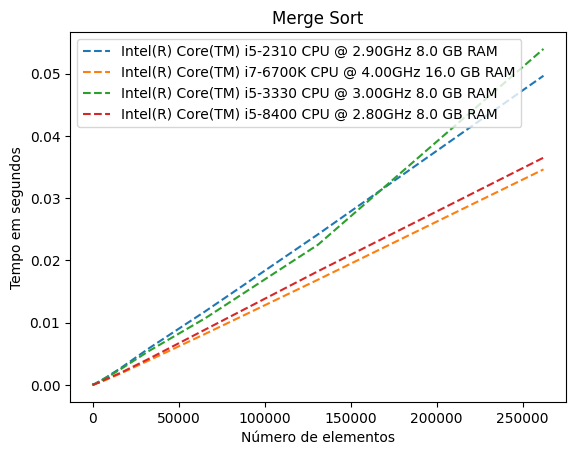

In [47]:
cur.execute('SELECT cpu, ram FROM hardware')
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM merge({hardware_id}) WHERE size > 16')
    merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
    merge_results['desv_pad'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)/10e5
    display(merge_results)
    plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.title('Merge Sort')
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()

Podemos ver as diferenças de tempo de execução em cada tipo de hardware.

,Intel(R) Core(TM) i5-2310 CPU @ 2.90GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,5,1,32,2,2,2,2,3,0.000002,4.472136e-07
1,6,1,64,3,3,4,5,6,0.000004,1.303840e-06
2,7,1,128,10,10,10,12,12,0.000011,1.095445e-06
3,8,1,256,26,25,27,28,29,0.000027,1.581139e-06
4,9,1,512,56,57,57,58,60,0.000058,1.516575e-06
5,10,1,1024,128,128,130,130,132,0.000130,1.673320e-06
6,11,1,2048,292,290,292,292,298,0.000293,3.033150e-06
7,12,1,4096,634,630,688,636,633,0.000644,2.458048e-05
8,13,1,8192,1335,1338,1340,1365,1392,0.001354,2.438237e-05
9,14,1,16384,2836,2819,2858,2825,2831,0.002834,1.495660e-05


,Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz 16.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,23,2,32,1,1,1,1,2,0.000001,4.472136e-07
1,24,2,64,3,4,3,4,5,0.000004,8.366600e-07
2,25,2,128,5,6,7,7,8,0.000007,1.140175e-06
3,26,2,256,14,16,16,16,17,0.000016,1.095445e-06
4,27,2,512,33,34,37,35,36,0.000035,1.581139e-06
5,28,2,1024,73,74,75,78,80,0.000076,2.915476e-06
6,29,2,2048,364,229,214,206,253,0.000253,6.447247e-05
7,30,2,4096,374,374,376,379,380,0.000377,2.792848e-06
8,31,2,8192,808,809,812,831,818,0.000816,9.449868e-06
9,32,2,16384,1746,1744,1746,1759,1756,0.001750,6.797058e-06


,Intel(R) Core(TM) i5-3330 CPU @ 3.00GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,41,3,32,1,1,2,2,3,0.000002,8.366600e-07
1,42,3,64,2,3,3,4,5,0.000003,1.140175e-06
2,43,3,128,5,6,7,9,14,0.000008,3.563706e-06
3,44,3,256,19,19,20,21,24,0.000021,2.073644e-06
4,45,3,512,50,51,50,52,52,0.000051,1.000000e-06
5,46,3,1024,109,111,110,112,114,0.000111,1.923538e-06
6,47,3,2048,237,238,240,242,244,0.000240,2.863564e-06
7,48,3,4096,561,592,537,540,542,0.000554,2.302824e-05
8,49,3,8192,1136,1137,1141,1140,1139,0.001139,2.073644e-06
9,50,3,16384,2541,2561,2613,2546,2559,0.002564,2.867054e-05


,Intel(R) Core(TM) i5-8400 CPU @ 2.80GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,59,4,32,1,1,1,1,2,0.000001,4.472136e-07
1,60,4,64,2,2,2,3,4,0.000003,8.944272e-07
2,61,4,128,4,4,4,7,8,0.000005,1.949359e-06
3,62,4,256,12,12,13,15,18,0.000014,2.549510e-06
4,63,4,512,32,34,35,37,39,0.000035,2.701851e-06
5,64,4,1024,88,111,85,85,89,0.000092,1.099091e-05
6,65,4,2048,183,184,187,188,191,0.000187,3.209361e-06
7,66,4,4096,414,412,421,415,445,0.000421,1.361249e-05
8,67,4,8192,1049,916,917,919,946,0.000949,5.705524e-05
9,68,4,16384,2004,2002,2004,2018,2038,0.002013,1.527089e-05


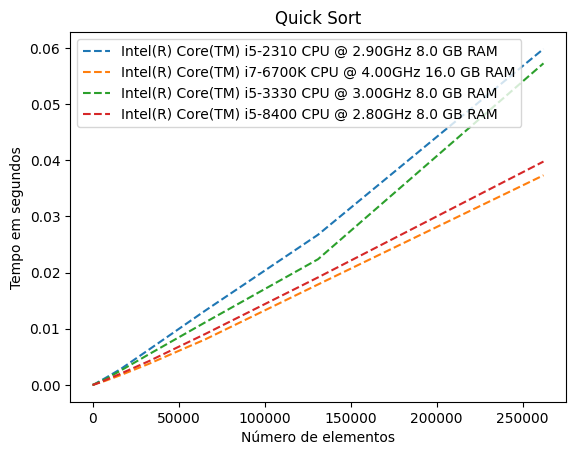

In [50]:
cur.execute('SELECT cpu, ram FROM hardware')
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM quick({hardware_id}) WHERE size > 16')
    quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
    quick_results['desv_pad'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)/10e5
    display(quick_results)
    plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.title('Quick Sort')
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()

,Intel(R) Core(TM) i5-2310 CPU @ 2.90GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,5,1,32,4,4,4,4,4,0.000004,0.000000e+00
1,6,1,64,12,12,13,13,13,0.000013,5.477226e-07
2,7,1,128,46,47,48,48,46,0.000047,1.000000e-06
3,8,1,256,176,169,172,176,172,0.000173,3.000000e-06
4,9,1,512,625,629,640,630,775,0.000660,6.463513e-05
5,10,1,1024,2553,2572,2630,2566,2552,0.002575,3.212164e-05
6,11,1,2048,10558,10427,10253,10206,10228,0.010334,1.524838e-04
7,12,1,4096,43186,43296,43385,43879,43700,0.043489,2.900409e-04
8,13,1,8192,197810,200607,201080,200600,201280,0.200275,1.409798e-03
9,14,1,16384,876385,1041594,871583,863747,869357,0.904533,7.675379e-02


,Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz 16.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,23,2,32,2,3,3,3,3,0.000003,4.472136e-07
1,24,2,64,11,13,12,10,12,0.000012,1.140175e-06
2,25,2,128,36,37,38,30,36,0.000035,3.130495e-06
3,26,2,256,151,146,148,117,152,0.000143,1.461848e-05
4,27,2,512,587,422,466,421,411,0.000461,7.335053e-05
5,28,2,1024,1707,1766,1683,2466,2369,0.001998,3.854850e-04
6,29,2,2048,9911,6482,8978,8754,8248,0.008475,1.266543e-03
7,30,2,4096,28539,28576,30185,28219,28556,0.028815,7.798227e-04
8,31,2,8192,130371,129941,130314,130656,129984,0.130253,2.957020e-04
9,32,2,16384,590661,590185,609529,588631,612261,0.598253,1.160481e-02


,Intel(R) Core(TM) i5-3330 CPU @ 3.00GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,41,3,32,3,3,3,4,4,0.000003,5.477226e-07
1,42,3,64,9,11,12,13,13,0.000012,1.673320e-06
2,43,3,128,42,40,41,42,44,0.000042,1.483240e-06
3,44,3,256,165,163,165,168,168,0.000166,2.167948e-06
4,45,3,512,612,605,607,609,620,0.000611,5.856620e-06
5,46,3,1024,2322,2360,2430,2323,2381,0.002363,4.500778e-05
6,47,3,2048,9188,9206,9218,9513,9914,0.009408,3.131951e-04
7,48,3,4096,39769,40905,39975,39130,40886,0.040133,7.626372e-04
8,49,3,8192,193190,192034,191762,192118,187927,0.191406,2.019540e-03
9,50,3,16384,818014,841650,811677,819336,831421,0.824420,1.199119e-02


,Intel(R) Core(TM) i5-8400 CPU @ 2.80GHz 8.0 GB RAM,hardware_id,size,time1,time2,time3,time4,time5,avg,desv_pad
0,59,4,32,2,2,3,3,3,0.000003,5.477226e-07
1,60,4,64,6,7,7,7,8,0.000007,7.071068e-07
2,61,4,128,28,30,30,31,32,0.000030,1.483240e-06
3,62,4,256,118,118,118,118,119,0.000118,4.472136e-07
4,63,4,512,434,429,434,437,438,0.000434,3.507136e-06
5,64,4,1024,1670,1642,2068,1674,1661,0.001743,1.820989e-04
6,65,4,2048,7824,6811,6538,8548,6699,0.007284,8.677220e-04
7,66,4,4096,35514,31181,30969,32347,32174,0.032437,1.821933e-03
8,67,4,8192,146310,146416,145190,148142,147403,0.146692,1.127622e-03
9,68,4,16384,627860,632451,627758,627560,650022,0.633130,9.662516e-03


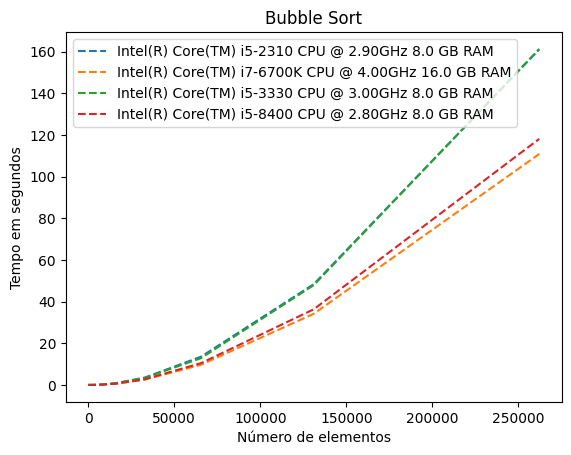

In [51]:
cur.execute('SELECT cpu, ram FROM hardware')
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM bubble({hardware_id}) WHERE size > 16')
    bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
    bubble_results['desv_pad'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)/10e5
    display(bubble_results)
    plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.title('Bubble Sort')
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()